# Data Cleaning Notebook

In this notebook, I load the datasets, investigate the datasets to better understand the data, and clean some of the data. Then I merge some of the data sets to prepare to answer some of my intial questions, leading to further data cleaning.

## Data Understanding

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from glob import glob

In [3]:
csv_files = glob('data/zippedData/*.csv.gz')
csv_files

['data/zippedData\\bom.movie_gross.csv.gz',
 'data/zippedData\\imdb.name.basics.csv.gz',
 'data/zippedData\\imdb.title.akas.csv.gz',
 'data/zippedData\\imdb.title.basics.csv.gz',
 'data/zippedData\\imdb.title.crew.csv.gz',
 'data/zippedData\\imdb.title.principals.csv.gz',
 'data/zippedData\\imdb.title.ratings.csv.gz',
 'data/zippedData\\tmdb.movies.csv.gz',
 'data/zippedData\\tn.movie_budgets.csv.gz']

In [4]:
import os

In [5]:
csv_files_dict = {}
for filename in csv_files:
    clean_filename = os.path.basename(filename).replace('.csv', '').replace('.','_')
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[clean_filename] = filename_df

In [6]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [7]:
# load data into pandas DataFrames

gross_df = csv_files_dict['bom_movie_gross_gz']
names_df = csv_files_dict['imdb_name_basics_gz']
akas_df = csv_files_dict['imdb_title_akas_gz']
titles_df = csv_files_dict['imdb_title_basics_gz']
crews_df = csv_files_dict['imdb_title_crew_gz']
principals_df = csv_files_dict['imdb_title_principals_gz']
ratings_df = csv_files_dict['imdb_title_ratings_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
budgets_df = csv_files_dict['tn_movie_budgets_gz']

We have now added all of the files in the dataset. Due to limitations and for the purpose of this project, we will only be using the following files:

- 'imdb_name_basics_gz'
- 'imdb_title_basics_gz'
- 'imdb_title_principals_gz'
- 'tn_movie_budgets_gz'

**Create functions for understanding the data**

When investigating the dataset, these functions will allow us to more quickly check each DataFrame for any data that may need to be cleaned. Previewing each DataFrame can be used to create a diagram that keeps track of each DataFrame's columns and how they can be joined.


In [8]:
# function to return percentage of missing values in a DataFrame

def missing_values(df):
    return df.isna().sum()/len(df)

In [9]:
#function to return all duplicate values in a DataFrame

def check_duplicates(df):
    return df[df.duplicated(keep=False)]

In [10]:
# function to print the value counts of each column in a DataFrame

def col_counts(df):
    for col in df:
        print (f"Value counts from col: {col}")
        print(f"\n{df[col].value_counts(normalize=True)}")
        print("\n")

**Begin to understand each DataFrame**

In [11]:
titles_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In order to more easily work with the 'tconst' column, we may need to reset the index later.

In [12]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [13]:
missing_values(titles_df)

primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

It looks like there are a number of missing values for runtime_minutes. We may need to deal with these missing values later.

In [14]:
check_duplicates(titles_df)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt10013288,The Promise,The Promise,2017,NaN,Drama
tt10042440,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
...,...,...,...,...,...
tt9660588,3. Elma,3. Elma,2014,65.0,Drama
tt9678524,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary
tt9688944,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary


In [15]:
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


the id index for budgets_df only has values 1 to 82. We will need to reset this index. 

In [18]:
missing_values(budgets_df)

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [19]:
check_duplicates(budgets_df)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


In [20]:
col_counts(budgets_df)

Value counts from col: release_date

Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
                  ...   
Sep 15, 1989    0.000173
Dec 9, 1981     0.000173
Jun 18, 1986    0.000173
Apr 16, 2013    0.000173
Feb 7, 1992     0.000173
Name: release_date, Length: 2418, dtype: float64


Value counts from col: movie

Home                                       0.000519
King Kong                                  0.000519
Halloween                                  0.000519
Ghostbusters                               0.000346
The Day the Earth Stood Still              0.000346
                                             ...   
Haakon Haakonsen                           0.000173
Friday the 13th Part VII: The New Blood    0.000173
Hero                                       0.000173
The Phantom                                0.000173
Gravity                                    0.000173
Name: movie, Length: 5698, dtype: f

At a glance, December 31st looks like a popular release date. Let's explore release dates later and if there's a reason for that.

In [21]:
names_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [22]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [23]:
missing_values(names_df)

primary_name          0.000000
birth_year            0.863618
death_year            0.988819
primary_profession    0.084629
known_for_titles      0.049788
dtype: float64

With so many missing values for 'birth_year' and 'death_year', we likely will not be using this columns.

In [24]:
col_counts(names_df)

Value counts from col: primary_name

Michael Brown          0.000026
James Brown            0.000026
David Brown            0.000025
Michael Johnson        0.000023
Mark Davis             0.000021
                         ...   
Marco Barada           0.000002
Regina Stulman Dias    0.000002
Antoine Gouy           0.000002
Luis Dechtiar          0.000002
Haroon Ashraf          0.000002
Name: primary_name, Length: 577203, dtype: float64


Value counts from col: birth_year

1978.0    0.026989
1980.0    0.026869
1979.0    0.026591
1982.0    0.025745
1981.0    0.025684
            ...   
1766.0    0.000012
1764.0    0.000012
1761.0    0.000012
1759.0    0.000012
973.0     0.000012
Name: birth_year, Length: 267, dtype: float64


Value counts from col: death_year

2018.0    0.091995
2017.0    0.091552
2016.0    0.087277
2015.0    0.079611
2013.0    0.064426
            ...   
1847.0    0.000147
1848.0    0.000147
1850.0    0.000147
1854.0    0.000147
1031.0    0.000147
Name: death_year, Leng

In [25]:
principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [26]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [27]:
missing_values(principals_df)

ordering      0.000000
nconst        0.000000
category      0.000000
job           0.827187
characters    0.617423
dtype: float64

83% of rows are missing values for job and 62% for characters. We will likely end up dropping these columns later.

In [28]:
col_counts(principals_df)

Value counts from col: ordering

1     0.139521
2     0.130958
3     0.123069
4     0.114546
5     0.105878
6     0.097395
7     0.088330
8     0.078378
9     0.067321
10    0.054604
Name: ordering, dtype: float64


Value counts from col: nconst

nm1930572     3.676378e-04
nm0000636     1.556139e-04
nm0000616     1.439428e-04
nm0103977     1.225459e-04
nm4394575     1.001764e-04
                  ...     
nm10152636    9.725867e-07
nm6488435     9.725867e-07
nm9195626     9.725867e-07
nm9253585     9.725867e-07
nm10533892    9.725867e-07
Name: nconst, Length: 604546, dtype: float64


Value counts from col: category

actor                  0.249681
director               0.142380
actress                0.142200
producer               0.110606
cinematographer        0.077895
composer               0.074950
writer                 0.072319
self                   0.063631
editor                 0.053990
production_designer    0.009116
archive_footage        0.003216
archive_sound          0

## Data Preparation

### Data Cleaning

**titles_df**

We saw above the column 'tconst' was set as the index of titles_df. Let's reset the index so we can more easily access this column.

In [29]:
#reset the titles_df index and check the change.
titles_df.reset_index(inplace=True)
titles_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


**budgets_df**

The budget and gross numbers in budget_df need to be converted to from strings to integers. we need to replace the $ and commas in order to properly covert these values to numbers.

In [30]:
#create a function to convert columns in dollars to float values.

def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [31]:
# create a list of the columns that need to be changed, then use a for loop so only these columns in budgets_df are updated.
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    budgets_df = convert_dol_to_float(budgets_df, col)

In [32]:
# confirm the datatypes of these columns changed
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [33]:
# reset index

budgets_df.reset_index(inplace=True)
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


**names_df**

We saw above there were very limited values in the 'birth_year' and 'death_year' columns. Let's drop these columns.

In [34]:
#drop columns with limited values
names_df.drop(columns = ['birth_year', 'death_year'], inplace=True)
names_df.head()

,primary_name,primary_profession,known_for_titles
nconst,,,
nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


**principals_df**

Just like we did with the names_df, let's drop the 'job' and 'characters' columns as they don't look very helpful.

In [35]:
principals_df.drop(columns = ['job', 'characters'], inplace = True)
principals_df.head()

,ordering,nconst,category
tconst,,,
tt0111414,1,nm0246005,actor
tt0111414,2,nm0398271,director
tt0111414,3,nm3739909,producer
tt0323808,10,nm0059247,editor
tt0323808,1,nm3579312,actress


Let's also reset the index so we can use the 'tconst' column. There are duplicate values in the tconst column, so it doesn't make a great key.

In [36]:
principals_df.reset_index(inplace=True)

In [48]:
principals_df.set_index('nconst', inplace=True)
principals_df

,tconst,ordering,category
nconst,,,
nm0246005,tt0111414,1,actor
nm0398271,tt0111414,2,director
nm3739909,tt0111414,3,producer
nm0059247,tt0323808,10,editor
nm3579312,tt0323808,1,actress
...,...,...,...
nm0186469,tt9692684,1,actor
nm4929530,tt9692684,2,self
nm10441594,tt9692684,3,director


## Merging Datasets and Feature Engineering

In [50]:
# using the merge method to merge dataframes with different keys.
# left table is gross_df, since it has fewer values--we will use a left join.

title_gross_df = gross_df.merge(titles_df, how='left',
                                left_on='title', right_on='primary_title')
title_gross_df

,title,studio,domestic_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),BV,334200000.0,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,2010,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...,...,...,...
4142,The Quake,Magn.,6200.0,2018,tt6523720,The Quake,Skjelvet,2018.0,106.0,"Action,Drama,Thriller"
4143,Edward II (2018 re-release),FM,4800.0,2018,NaN,NaN,NaN,NaN,NaN,NaN
4144,El Pacto,Sony,2500.0,2018,NaN,NaN,NaN,NaN,NaN,NaN
4145,The Swan,Synergetic,2400.0,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
missing_values(title_gross_df)

title              0.000000
studio             0.001206
domestic_gross     0.008440
year               0.000000
tconst             0.188329
primary_title      0.188329
original_title     0.188329
start_year         0.188329
runtime_minutes    0.228840
genres             0.197974
dtype: float64

In [52]:
# since we're interested in genres, need to drop any rows that are missing genre values.
title_gross_df.dropna(subset=['genres'], inplace=True)
missing_values(title_gross_df)

title              0.000000
studio             0.000902
domestic_gross     0.007216
year               0.000000
tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.042393
genres             0.000000
dtype: float64

### title_df and budgets_df merge

We are interested in exploring how the return on investment of a movie is related to its genre, runtime, or the time of year it is released. To explore this, we need to join title_df and budget_df.

In [37]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [38]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Since there are far fewer rows in budgets_df, let's use that as our left table. Since we aren't joining these DataFrames on indexes, we will use the .merge method.

In [39]:
title_budgets_df = budgets_df.merge(titles_df, how='left',
                                   left_on = 'movie', right_on = 'primary_title')
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
7217,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,NaN,NaN
7218,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,NaN,NaN
7219,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [40]:
missing_values(title_budgets_df)

id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
tconst               0.471680
primary_title        0.471680
original_title       0.471818
start_year           0.471680
runtime_minutes      0.539122
genres               0.481651
dtype: float64

Since we are interested in genres and runtime, we need to drop any rows that are missing these values.

In [41]:
# drop rows with missing values in column 'genres', 'runtime_minutes'. Recheck for missing values.

title_budgets_df.dropna(subset=['genres', 'runtime_minutes'], inplace=True)
missing_values(title_budgets_df)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
tconst               0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
dtype: float64

**Additional columns**

In order to calculate ROI, we will need to add a new column. We will calculate ROI by subtracting production_budget from worldwide_gross, then dividing by production_budget. We should be ready to calculate this new column since we converted these values to float.

In [42]:
# Adding a column to calculate ROI.
title_budgets_df['ROI'] = (title_budgets_df['worldwide_gross'] - title_budgets_df['production_budget']) / title_budgets_df['production_budget']
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",5.827114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,8.459600
7211,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-0.490667
7216,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-1.000000


We also noticed our genre column often lists multiple genres for a single movie. We need to get the genre into a single category to simplify our data analysis. For these purposes, we are assuming the first listed genre is the movie's primary genre.

In [44]:
#split genre column into a new column, where each genre is an item in a list.

title_budgets_df['genres_split'] = title_budgets_df['genres'].map(lambda x: x.split(',') if x else x)

In [45]:
#create a new column called 'primary_genre' by accessing the first item in the 'genres_split' column.

title_budgets_df['primary_genre'] = title_budgets_df['genres_split'].map(lambda x: x[0])
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI,genres_split,primary_genre
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,5.532577,[Horror],Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.546673,"[Action, Adventure, Fantasy]",Action
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-0.572108,"[Action, Adventure, Sci-Fi]",Action
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",3.243841,"[Action, Adventure, Sci-Fi]",Action
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",5.827114,"[Action, Adventure, Sci-Fi]",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",12.871100,"[Comedy, Drama, Horror]",Comedy
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,8.459600,[Drama],Drama
7211,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-0.490667,"[Comedy, Drama]",Comedy
7216,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-1.000000,"[Horror, Sci-Fi, Thriller]",Horror


We are also interested in knowing how release dates affect a movie's profitability. We can break out the 'release_date' column and create columns for 'release_month' and 'release_year'.

In [46]:
title_budgets_df['release_month'] = title_budgets_df['release_date'].map(lambda x: x.split()[0])
title_budgets_df['release_month'] 

0       Dec
1       May
2       Jun
3       May
6       Apr
       ... 
7204    Apr
7205    Jul
7211    Jan
7216    Dec
7219    Sep
Name: release_month, Length: 3309, dtype: object

In [47]:
title_budgets_df['release_year'] = title_budgets_df['release_date'].map(lambda x: x.split()[2])
title_budgets_df['release_year'] 

0       2009
1       2011
2       2019
3       2015
6       2018
        ... 
7204    2006
7205    2001
7211    2012
7216    2018
7219    2015
Name: release_year, Length: 3309, dtype: object

In [48]:
title_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ROI,genres_split,primary_genre,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,5.532577,[Horror],Horror,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.546673,"[Action, Adventure, Fantasy]",Action,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",-0.572108,"[Action, Adventure, Sci-Fi]",Action,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",3.243841,"[Action, Adventure, Sci-Fi]",Action,May,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",5.827114,"[Action, Adventure, Sci-Fi]",Action,Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",12.871100,"[Comedy, Drama, Horror]",Comedy,Apr,2006
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011.0,93.0,Drama,8.459600,[Drama],Drama,Jul,2001
7211,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",-0.490667,"[Comedy, Drama]",Comedy,Jan,2012
7216,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",-1.000000,"[Horror, Sci-Fi, Thriller]",Horror,Dec,2018


This DataFrame is nearly ready to be exported as a csv. Let's just do some quick final clean ups of columns.

In [49]:
## delete unnecessary columns

title_budgets_df.drop(columns=['id','primary_title', 'original_title', 'start_year', 'genres_split'], inplace=True)
title_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7204,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,70.0,"Comedy,Drama,Horror",12.871100,Comedy,Apr,2006
7205,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,93.0,Drama,8.459600,Drama,Jul,2001
7211,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,95.0,"Comedy,Drama",-0.490667,Comedy,Jan,2012
7216,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-1.000000,Horror,Dec,2018


In [71]:
# remove any duplicates on release_date and movie.

title_budgets_df = title_budgets_df.drop_duplicates(subset=['release_date', 'movie'])

In [72]:
# export the dataframe as a csv file to be loaded into our analysis notebook.

title_budgets_df.to_csv('./data/cleaned_title_budgets_df.csv')

**names_df and principals_df**

We are also interested in learning more about the directors of a movie and how that affects a movie's profitability. Since the principals_df, which contains the information for directors, does not include actual names, we will need to merge with the names_df in order to get names of any directors.

In [51]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   primary_name        606648 non-null  object
 1   primary_profession  555308 non-null  object
 2   known_for_titles    576444 non-null  object
dtypes: object(3)
memory usage: 18.5+ MB


In [55]:
names_df.reset_index(inplace=True)
names_df

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606643,nm9990381,Susan Grobes,actress,NaN
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,producer,NaN


In [52]:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   ordering  1028186 non-null  int64 
 2   nconst    1028186 non-null  object
 3   category  1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [60]:
check_duplicates(names_df)

,nconst,primary_name,primary_profession,known_for_titles


In [65]:
principals_names_df = names_df.merge(principals_df, left_on=['nconst'], right_on=['nconst'], how ='left')
principals_names_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9.0,producer
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7.0,composer
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8.0,composer
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8.0,composer
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7.0,composer
...,...,...,...,...,...,...,...
1030265,nm9990381,Susan Grobes,actress,NaN,tt6527982,2.0,actress
1030266,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130",tt8737130,4.0,actress
1030267,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610",tt8734436,3.0,actress
1030268,nm9991786,Michelle Modigliani,producer,NaN,tt8739240,9.0,producer


Since we are interested in directors for our analysis, let's create a new dataframe containing just the information for directors.

In [99]:
directors_df = principals_names_df.loc[principals_names_df['category']=='director']
directors_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,director
...,...,...,...,...,...,...
1030239,nm9971456,Zheng Wei,director,NaN,tt8697720,director
1030247,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,director
1030248,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,director
1030249,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,director


In [100]:
missing_values(directors_df)

nconst                0.000000
primary_name          0.000000
primary_profession    0.004010
known_for_titles      0.028717
tconst                0.000000
category              0.000000
dtype: float64

In [101]:
# export the dataframe as a csv file to be loaded into our analysis notebook.

directors_df.to_csv('./data/cleaned_directors_df.csv')

Let's clean up the file before exporting as a csv file.

In [93]:
missing_values(principals_names_df)

nconst                0.000000
primary_name          0.000000
primary_profession    0.052096
known_for_titles      0.029668
tconst                0.002289
ordering              0.002289
category              0.002289
dtype: float64

We won't be using the ordering column or any rows missing values for 'tconst'.

In [95]:
principals_names_df.drop(columns = ['ordering'], inplace=True)
principals_names_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,category
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,composer
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,composer
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,composer
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,composer
...,...,...,...,...,...,...
1030265,nm9990381,Susan Grobes,actress,NaN,tt6527982,actress
1030266,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130",tt8737130,actress
1030267,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610",tt8734436,actress
1030268,nm9991786,Michelle Modigliani,producer,NaN,tt8739240,producer


In [97]:
principals_names_df.dropna(subset = ['tconst'], inplace=True)
missing_values(principals_names_df)

nconst                0.000000
primary_name          0.000000
primary_profession    0.052189
known_for_titles      0.029640
tconst                0.000000
category              0.000000
dtype: float64

In [102]:
principals_names_df.drop(columns = ['primary_profession', 'known_for_titles'], inplace=True)
principals_names_df

,nconst,primary_name,tconst,category
0,nm0061671,Mary Ellen Bauder,tt2398241,producer
1,nm0061865,Joseph Bauer,tt0433397,composer
2,nm0061865,Joseph Bauer,tt1681372,composer
3,nm0061865,Joseph Bauer,tt2387710,composer
4,nm0061865,Joseph Bauer,tt2281215,composer
...,...,...,...,...
1030265,nm9990381,Susan Grobes,tt6527982,actress
1030266,nm9990690,Joo Yeon So,tt8737130,actress
1030267,nm9991320,Madeline Smith,tt8734436,actress
1030268,nm9991786,Michelle Modigliani,tt8739240,producer


We can later merge this data with our other cleaned up title_budgets_df in order to get run profitability analyses on principals.

In [103]:
# export the dataframe as a csv file to be loaded into our analysis notebook.

principals_names_df.to_csv('./data/cleaned_principals_names_df.csv')

## Analysis

**Move to new notebook**

### ROI by Genre

In [73]:
title_budgets_df['primary_genre'].value_counts()

Action         545
Drama          477
Comedy         410
Adventure      199
Biography      150
Documentary    137
Horror         135
Crime          122
Thriller        22
Animation       22
Sci-Fi          11
Family           8
Fantasy          7
Mystery          6
Romance          5
Musical          4
Music            2
War              1
Western          1
Name: primary_genre, dtype: int64

Action films appear most frequently in the dataset. Let's see which genres have the highest ROI.

In [75]:
title_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,Action,Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7204,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,70.0,"Comedy,Drama,Horror",12.871100,Comedy,Apr,2006
7205,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,93.0,Drama,8.459600,Drama,Jul,2001
7211,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,95.0,"Comedy,Drama",-0.490667,Comedy,Jan,2012
7216,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-1.000000,Horror,Dec,2018


In [76]:
genres_ROI_df = title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df['count'] = title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,count
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,545
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,199
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,22
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,150
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,410
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,122
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,137
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,477
8,Family,2.870000e+07,8.586196e+07,2.797255e+08,96.625000,1.395720,8
9,Fantasy,1.925714e+07,1.885818e+07,3.781328e+07,99.000000,0.595759,7


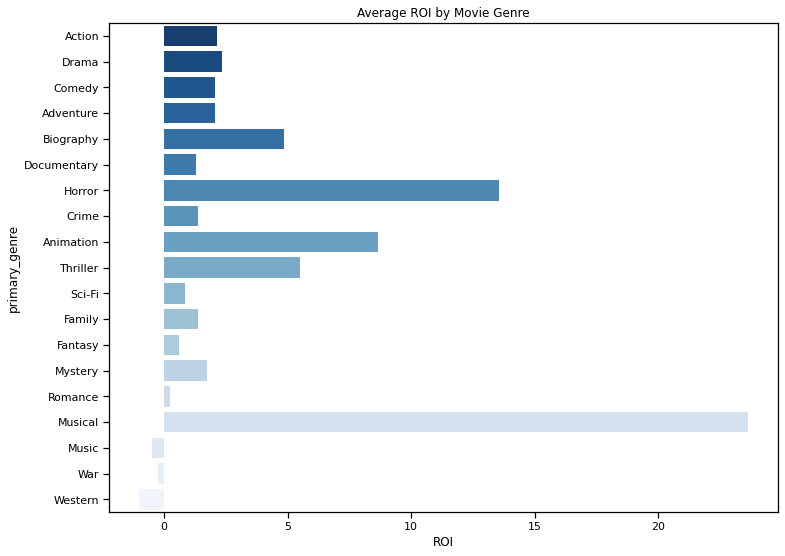

In [92]:
sns.set_context('notebook')
plt.figure(figsize=(12,9))
sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette="Blues_r").set_title('Average ROI by Movie Genre');

For the genres with few values, one successful movie can quickly throw off our dataset. Let's look at ROI for only the 10 most frequent genre categories.

In [77]:
genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)

In [78]:
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,count
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,545
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,477
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,410
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,199
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,150
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,137
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,135
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,122
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,22
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,22


In [82]:
frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,count
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,545
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,477
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,410
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,199
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,150
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,137
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,135
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,122
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,22
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,22


In [83]:
frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

<ipython-input-83-483fb9710f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)


,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,count
10,Horror,1.453301e+07,3.343511e+07,7.496393e+07,92.637037,13.565620,135
2,Animation,4.148987e+07,8.094487e+07,1.795110e+08,85.181818,8.663802,22
16,Thriller,1.819787e+07,1.908578e+07,3.719005e+07,89.954545,5.499232,22
3,Biography,2.212839e+07,3.229156e+07,6.509016e+07,108.613333,4.862634,150
7,Drama,1.882577e+07,2.514349e+07,5.109156e+07,103.129979,2.343496,477
0,Action,7.014503e+07,7.707130e+07,2.086961e+08,110.431193,2.131694,545
4,Comedy,2.040214e+07,3.200412e+07,5.884439e+07,100.321951,2.063920,410
1,Adventure,6.884572e+07,8.452708e+07,2.318463e+08,99.256281,2.047448,199
5,Crime,2.204475e+07,2.278042e+07,4.824999e+07,106.377049,1.376411,122
6,Documentary,1.860148e+07,2.544510e+07,4.829217e+07,73.160584,1.292990,137


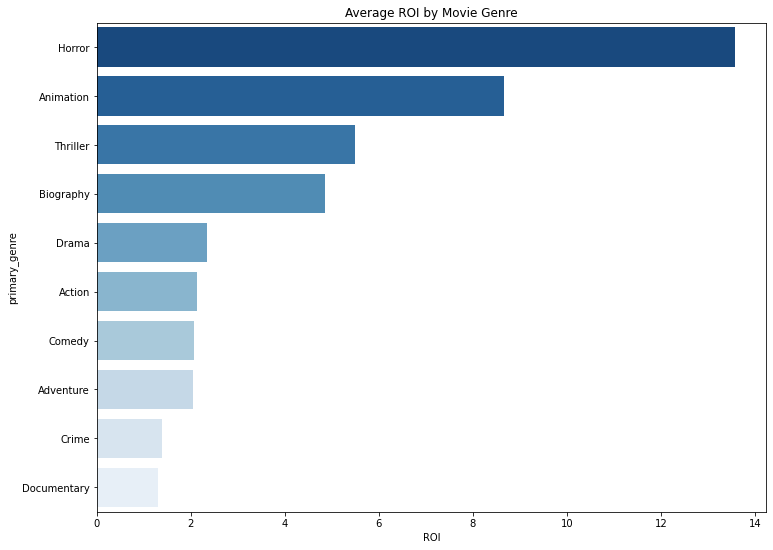

In [84]:
plt.figure(figsize=(12,9))
sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette="Blues_r").set_title('Average ROI by Movie Genre');

<AxesSubplot:xlabel='primary_genre', ylabel='Count'>

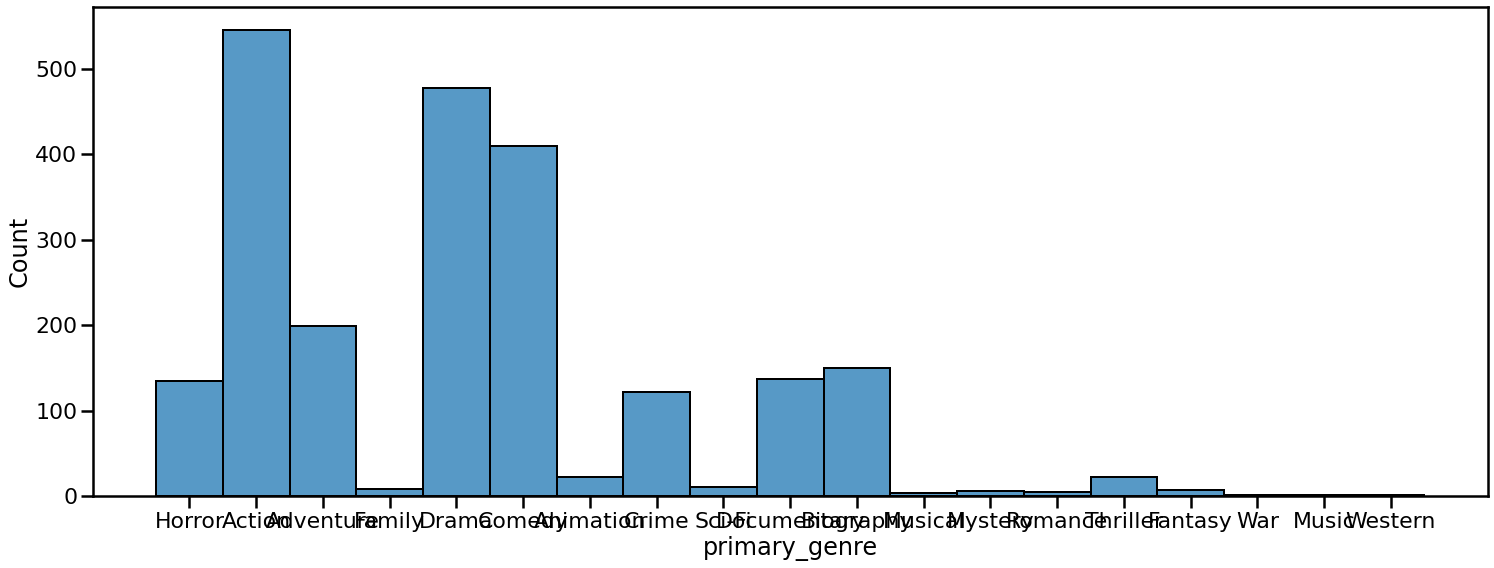

In [90]:

plt.figure(figsize=(25,9))
sns.histplot(title_budgets_df, x='primary_genre')


### Highest Grossing Directors

To analyze which directors bring in the highest grossings, we need to combine a subset of the principals_names_df with title_budgets_df.

In [78]:
## narrow down principals_names_df into just directors.

directors_df = principals_names_df.loc[principals_names_df['category']=='director']
directors_df

,nconst,primary_name,tconst,ordering,category
81,nm0000080,Orson Welles,tt0069049,5.0,director
136,nm0000095,Woody Allen,tt1605783,5.0,director
137,nm0000095,Woody Allen,tt1182350,5.0,director
141,nm0000095,Woody Allen,tt2334873,5.0,director
142,nm0000095,Woody Allen,tt2870756,5.0,director
...,...,...,...,...,...
1030256,nm9993281,Marija Ratkovic Vidakovic,tt8743078,2.0,director
1030258,nm9993379,Fanny Hozleiter,tt8743182,6.0,director
1030259,nm9993380,Pegasus Envoyé,tt8743182,5.0,director
1030260,nm9993381,Zoltán Vékony,tt8743182,7.0,director


In [79]:
title_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,genres_split,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,5.532577,[Horror],Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",1.546673,"[Action, Adventure, Fantasy]",Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-0.572108,"[Action, Adventure, Sci-Fi]",Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",3.243841,"[Action, Adventure, Sci-Fi]",Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",5.827114,"[Action, Adventure, Sci-Fi]",Action,Apr,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,70.0,"Comedy,Drama,Horror",12.871100,"[Comedy, Drama, Horror]",Comedy,Apr,2006
7205,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,93.0,Drama,8.459600,[Drama],Drama,Jul,2001
7211,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,95.0,"Comedy,Drama",-0.490667,"[Comedy, Drama]",Comedy,Jan,2012
7216,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,77.0,"Horror,Sci-Fi,Thriller",-1.000000,"[Horror, Sci-Fi, Thriller]",Horror,Dec,2018


In [80]:
## merge new directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(title_budgets_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

,nconst,primary_name,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,genres_split,primary_genre,release_month,release_year
0,nm0000080,Orson Welles,tt0069049,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nm0000095,Woody Allen,tt1605783,5.0,director,"May 20, 2011",Midnight in Paris,30000000.0,56816662.0,162502774.0,94.0,"Comedy,Fantasy,Romance",4.416759,"[Comedy, Fantasy, Romance]",Comedy,May,2011
2,nm0000095,Woody Allen,tt1182350,5.0,director,"Sep 22, 2010",You Will Meet a Tall Dark Stranger,15000000.0,3247816.0,34247816.0,98.0,"Comedy,Drama,Romance",1.283188,"[Comedy, Drama, Romance]",Comedy,Sep,2010
3,nm0000095,Woody Allen,tt2334873,5.0,director,"Jul 26, 2013",Blue Jasmine,18000000.0,33404871.0,102912961.0,98.0,Drama,4.717387,[Drama],Drama,Jul,2013
4,nm0000095,Woody Allen,tt2870756,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146567,nm9993281,Marija Ratkovic Vidakovic,tt8743078,2.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146568,nm9993379,Fanny Hozleiter,tt8743182,6.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146569,nm9993380,Pegasus Envoyé,tt8743182,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146570,nm9993381,Zoltán Vékony,tt8743182,7.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
missing_values(directors_title_budgets_df)

nconst               0.000000
primary_name         0.000000
tconst               0.000000
ordering             0.000000
category             0.000000
release_date         0.976653
movie                0.976653
production_budget    0.976653
domestic_gross       0.976653
worldwide_gross      0.976653
runtime_minutes      0.976653
genres               0.976653
ROI                  0.976653
genres_split         0.976653
primary_genre        0.976653
release_month        0.976653
release_year         0.976653
dtype: float64

In [83]:
directors_title_budgets_df.dropna(inplace=True)
directors_title_budgets_df

,nconst,primary_name,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,genres_split,primary_genre,release_month,release_year
1,nm0000095,Woody Allen,tt1605783,5.0,director,"May 20, 2011",Midnight in Paris,30000000.0,56816662.0,162502774.0,94.0,"Comedy,Fantasy,Romance",4.416759,"[Comedy, Fantasy, Romance]",Comedy,May,2011
2,nm0000095,Woody Allen,tt1182350,5.0,director,"Sep 22, 2010",You Will Meet a Tall Dark Stranger,15000000.0,3247816.0,34247816.0,98.0,"Comedy,Drama,Romance",1.283188,"[Comedy, Drama, Romance]",Comedy,Sep,2010
3,nm0000095,Woody Allen,tt2334873,5.0,director,"Jul 26, 2013",Blue Jasmine,18000000.0,33404871.0,102912961.0,98.0,Drama,4.717387,[Drama],Drama,Jul,2013
12,nm0000108,Luc Besson,tt2404311,5.0,director,"Sep 13, 2013",The Family,30000000.0,36918811.0,51078541.0,111.0,"Comedy,Crime,Thriller",0.702618,"[Comedy, Crime, Thriller]",Comedy,Sep,2013
13,nm0000108,Luc Besson,tt2239822,5.0,director,"Jul 21, 2017",Valerian and the City of a Thousand Planets,180000000.0,40479370.0,215098356.0,137.0,"Action,Adventure,Fantasy",0.194991,"[Action, Adventure, Fantasy]",Action,Jul,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145698,nm9853098,Suman Upreti,tt8439948,7.0,director,"Nov 17, 2006",Bobby,14000000.0,11242801.0,20597806.0,130.0,Drama,0.471272,[Drama],Drama,Nov,2006
145708,nm9856424,Byung-Jo Son,tt7106782,5.0,director,"Mar 9, 2007",The Namesake,8500000.0,13610521.0,20288774.0,77.0,Drama,1.386915,[Drama],Drama,Mar,2007
145709,nm9856462,Yaser Talebi,tt8450662,1.0,director,"Oct 16, 1998",Beloved,53000000.0,22852487.0,22852487.0,66.0,Documentary,-0.568821,[Documentary],Documentary,Oct,1998
146254,nm9935661,Dai Jinyuan,tt9252692,4.0,director,"Dec 24, 2003",Monster,5000000.0,34469210.0,64240813.0,86.0,"Sci-Fi,Thriller",11.848163,"[Sci-Fi, Thriller]",Sci-Fi,Dec,2003


In [ ]:
# Data Cleaning Notebook

In this notebook, I load the datasets, investigate the datasets to better understand the data, and clean some of the data. Then I merge some of the data sets to prepare to answer some of my intial questions, leading to further data cleaning.

## Data Understanding

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

csv_files = glob('data/zippedData/*.csv.gz')
csv_files

import os

csv_files_dict = {}
for filename in csv_files:
    clean_filename = os.path.basename(filename).replace('.csv', '').replace('.','_')
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[clean_filename] = filename_df

csv_files_dict.keys()

# load data into pandas DataFrames

gross_df = csv_files_dict['bom_movie_gross_gz']
names_df = csv_files_dict['imdb_name_basics_gz']
akas_df = csv_files_dict['imdb_title_akas_gz']
titles_df = csv_files_dict['imdb_title_basics_gz']
crews_df = csv_files_dict['imdb_title_crew_gz']
principals_df = csv_files_dict['imdb_title_principals_gz']
ratings_df = csv_files_dict['imdb_title_ratings_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
budgets_df = csv_files_dict['tn_movie_budgets_gz']

We have now added all of the files in the dataset. Due to limitations and for the purpose of this project, we will only be using the following files:

- 'imdb_name_basics_gz'
- 'imdb_title_basics_gz'
- 'imdb_title_principals_gz'
- 'tn_movie_budgets_gz'

**Create functions for understanding the data**

When investigating the dataset, these functions will allow us to more quickly check each DataFrame for any data that may need to be cleaned. Previewing each DataFrame can be used to create a diagram that keeps track of each DataFrame's columns and how they can be joined.


# function to return percentage of missing values in a DataFrame

def missing_values(df):
    return df.isna().sum()/len(df)

#function to return all duplicate values in a DataFrame

def check_duplicates(df):
    return df[df.duplicated(keep=False)]

# function to print the value counts of each column in a DataFrame

def col_counts(df):
    for col in df:
        print (f"Value counts from col: {col}")
        print(f"\n{df[col].value_counts(normalize=True)}")
        print("\n")

**Begin to understand each DataFrame**

titles_df.head()

In order to more easily work with the 'tconst' column, we may need to reset the index later.

titles_df.info()

missing_values(titles_df)

It looks like there are a number of missing values for runtime_minutes. We may need to deal with these missing values later.

check_duplicates(titles_df)

budgets_df.head()

budgets_df.info()

the id index for budgets_df only has values 1 to 82. We will need to reset this index. 

missing_values(budgets_df)

check_duplicates(budgets_df)

col_counts(budgets_df)

At a glance, December 31st looks like a popular release date. Let's explore release dates later and if there's a reason for that.

names_df.head()

names_df.info()

missing_values(names_df)

With so many missing values for 'birth_year' and 'death_year', we likely will not be using this columns.

col_counts(names_df)

principals_df.head()

principals_df.info()

missing_values(principals_df)

83% of rows are missing values for job and 62% for characters. We will likely end up dropping these columns later.

col_counts(principals_df)

## Data Preparation

### Data Cleaning

**titles_df**

We saw above the column 'tconst' was set as the index of titles_df. Let's reset the index so we can more easily access this column.

#reset the titles_df index and check the change.
titles_df.reset_index(inplace=True)
titles_df.head()

**budgets_df**

The budget and gross numbers in budget_df need to be converted to from strings to integers. we need to replace the $ and commas in order to properly covert these values to numbers.

#create a function to convert columns in dollars to float values.

def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

# create a list of the columns that need to be changed, then use a for loop so only these columns in budgets_df are updated.
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    budgets_df = convert_dol_to_float(budgets_df, col)

# confirm the datatypes of these columns changed
budgets_df.info()

# reset index

budgets_df.reset_index(inplace=True)
budgets_df

**names_df**

We saw above there were very limited values in the 'birth_year' and 'death_year' columns. Let's drop these columns.

#drop columns with limited values
names_df.drop(columns = ['birth_year', 'death_year'], inplace=True)
names_df.head()

**principals_df**

Just like we did with the names_df, let's drop the 'job' and 'characters' columns as they don't look very helpful.

principals_df.drop(columns = ['job', 'characters'], inplace = True)
principals_df.head()

Let's also reset the index so we can use the 'tconst' column. There are duplicate values in the tconst column, so it doesn't make a great key.

principals_df.reset_index(inplace=True)

principals_df.set_index('nconst', inplace=True)
principals_df

## Merging Datasets and Feature Engineering

# using the merge method to merge dataframes with different keys.
# left table is gross_df, since it has fewer values--we will use a left join.

title_gross_df = gross_df.merge(titles_df, how='left',
                                left_on='title', right_on='primary_title')
title_gross_df

missing_values(title_gross_df)

# since we're interested in genres, need to drop any rows that are missing genre values.
title_gross_df.dropna(subset=['genres'], inplace=True)
missing_values(title_gross_df)

### title_df and budgets_df merge

We are interested in exploring how the return on investment of a movie is related to its genre, runtime, or the time of year it is released. To explore this, we need to join title_df and budget_df.

titles_df.info()

budgets_df.info()

Since there are far fewer rows in budgets_df, let's use that as our left table. Since we aren't joining these DataFrames on indexes, we will use the .merge method.

title_budgets_df = budgets_df.merge(titles_df, how='left',
                                   left_on = 'movie', right_on = 'primary_title')
title_budgets_df

missing_values(title_budgets_df)

Since we are interested in genres and runtime, we need to drop any rows that are missing these values.

# drop rows with missing values in column 'genres', 'runtime_minutes'. Recheck for missing values.

title_budgets_df.dropna(subset=['genres', 'runtime_minutes'], inplace=True)
missing_values(title_budgets_df)

**Additional columns**

In order to calculate ROI, we will need to add a new column. We will calculate ROI by subtracting production_budget from worldwide_gross, then dividing by production_budget. We should be ready to calculate this new column since we converted these values to float.

# Adding a column to calculate ROI.
title_budgets_df['ROI'] = (title_budgets_df['worldwide_gross'] - title_budgets_df['production_budget']) / title_budgets_df['production_budget']
title_budgets_df

We also noticed our genre column often lists multiple genres for a single movie. We need to get the genre into a single category to simplify our data analysis. For these purposes, we are assuming the first listed genre is the movie's primary genre.

#split genre column into a new column, where each genre is an item in a list.

title_budgets_df['genres_split'] = title_budgets_df['genres'].map(lambda x: x.split(',') if x else x)

#create a new column called 'primary_genre' by accessing the first item in the 'genres_split' column.

title_budgets_df['primary_genre'] = title_budgets_df['genres_split'].map(lambda x: x[0])
title_budgets_df

We are also interested in knowing how release dates affect a movie's profitability. We can break out the 'release_date' column and create columns for 'release_month' and 'release_year'.

title_budgets_df['release_month'] = title_budgets_df['release_date'].map(lambda x: x.split()[0])
title_budgets_df['release_month'] 

title_budgets_df['release_year'] = title_budgets_df['release_date'].map(lambda x: x.split()[2])
title_budgets_df['release_year'] 

title_budgets_df

This DataFrame is nearly ready to be exported as a csv. Let's just do some quick final clean ups of columns.

## delete unnecessary columns

title_budgets_df.drop(columns=['id','primary_title', 'original_title', 'start_year', 'genres_split'], inplace=True)
title_budgets_df

# remove any duplicates on release_date and movie.

title_budgets_df = title_budgets_df.drop_duplicates(subset=['release_date', 'movie'])



# export the dataframe as a csv file to be loaded into our analysis notebook.

title_budgets_df.to_csv('./data/cleaned_title_budgets_df.csv')

**names_df and principals_df**

We are also interested in learning more about the directors of a movie and how that affects a movie's profitability. Since the principals_df, which contains the information for directors, does not include actual names, we will need to merge with the names_df in order to get names of any directors.

names_df.info()

names_df.reset_index(inplace=True)
names_df

principals_df.info()

check_duplicates(names_df)

principals_names_df = names_df.merge(principals_df, left_on=['nconst'], right_on=['nconst'], how ='left')
principals_names_df

Since we are interested in directors for our analysis, let's create a new dataframe containing just the information for directors.

directors_df = principals_names_df.loc[principals_names_df['category']=='director']
directors_df

missing_values(directors_df)

# export the dataframe as a csv file to be loaded into our analysis notebook.

directors_df.to_csv('./data/cleaned_directors_df.csv')



Let's clean up the file before exporting as a csv file.

missing_values(principals_names_df)

We won't be using the ordering column or any rows missing values for 'tconst'.

principals_names_df.drop(columns = ['ordering'], inplace=True)
principals_names_df

principals_names_df.dropna(subset = ['tconst'], inplace=True)
missing_values(principals_names_df)

principals_names_df.drop(columns = ['primary_profession', 'known_for_titles'], inplace=True)
principals_names_df



We can later merge this data with our other cleaned up title_budgets_df in order to get run profitability analyses on principals.

# export the dataframe as a csv file to be loaded into our analysis notebook.

principals_names_df.to_csv('./data/cleaned_principals_names_df.csv')

## Analysis

**Move to new notebook**

### ROI by Genre

title_budgets_df['primary_genre'].value_counts()

Action films appear most frequently in the dataset. Let's see which genres have the highest ROI.

title_budgets_df

genres_ROI_df = title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df['count'] = title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

sns.set_context('notebook')
plt.figure(figsize=(12,9))
sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette="Blues_r").set_title('Average ROI by Movie Genre');

For the genres with few values, one successful movie can quickly throw off our dataset. Let's look at ROI for only the 10 most frequent genre categories.

genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)

genres_ROI_df

frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df

frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

plt.figure(figsize=(12,9))
sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette="Blues_r").set_title('Average ROI by Movie Genre');


plt.figure(figsize=(25,9))
sns.histplot(title_budgets_df, x='primary_genre')


### Highest Grossing Directors

To analyze which directors bring in the highest grossings, we need to combine a subset of the principals_names_df with title_budgets_df.

## narrow down principals_names_df into just directors.

directors_df = principals_names_df.loc[principals_names_df['category']=='director']
directors_df

title_budgets_df

## merge new directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(title_budgets_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

missing_values(directors_title_budgets_df)

directors_title_budgets_df.dropna(inplace=True)
directors_title_budgets_df

